In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [36]:
tf.__version__

'2.5.0'

# Part 1: Data Pre processing

# Importing the dataset

In [37]:
dataset=pd.read_csv('Churn_Modelling.csv')
X=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values

In [38]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [39]:
print(y)

[1 0 1 ... 1 1 0]


In [40]:
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Encoding Categorical Data

# Label encoding the "Gender" column

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [42]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


# One hot encoding the "Geography" column

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])], remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [44]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Splitting the dataset into the Training and Test set

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


# Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [47]:
print(X_train[0])

[-1.01460667 -0.5698444   1.74309049  0.16958176 -1.09168714 -0.46460796
  0.00666099 -1.21571749  0.8095029   0.64259497 -1.03227043  1.10643166]


# Part 2 - Building the ANN

# Initializing the ANN

In [48]:
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer

In [49]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer

In [50]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer

In [51]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Part 3 - Training the ANN

# Compiling the ANN

In [52]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set

In [53]:
#train on 100,500,1000 epochs
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5731 - accuracy: 0.7369
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.8015
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.8067
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8114
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8160
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8186
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8204
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8232
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8255
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4087 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8637
Epoch 81/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8652
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8633
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8633
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8659
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8641
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8631
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8630
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8635
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 

# Part 4 - Making the predictions and evaluating the model
Predicting the result of 3 observation
Therefore, our ANN model predicts that this customer stays in the bank!

Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

Important note 2: Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.For Male you should encode as '1' and for Female '0'

Assignment

Use our ANN model to predict if the customers with the following informations will leave the bank:

Geography: France,Germany,Spain

Credit Score: 600,800,700

Gender: Male,Female,Male

Age: 40,50,35,years old

Tenure: 3,5,4 years

Balance: $ 60000,70000,0

Number of Products: 2,1,0

Does this customer have a credit card ? Yes,No,No

Is this customer an Active Member: Yes,No,No

Estimated Salary: $ 50000,10000,0

So, should we say goodbye to that customer ?

Sample If value is greater than 0.5 - True
Else -False

In [54]:
s=ann.predict(sc.transform([[1.0, 0.0, 0.0, 600, 1, 40, 3, 60000.0, 2, 1, 1, 50000]]))

In [55]:
if s>0.5:
    print(s,"True")
else:
    print(s,"False")

[[0.03942397]] False


In [56]:
d=ann.predict(sc.transform([[0.0, 1.0, 0.0, 800, 0, 50, 5, 70000.0, 1, 0, 0, 10000]]))

In [57]:
if d>0.5:
    print(d,"True")
else:
    print(d,"False")

[[0.8766626]] True


In [58]:
e=ann.predict(sc.transform([[0.0, 0.0, 1.0, 700, 1, 35, 4, 0.0, 0, 0, 0, 0]]))

In [59]:
if e>0.5:
    print(e,"True")
else:
    print(e,"False")

[[0.9846341]] True


# Predicting the Test set results

In [60]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [61]:
y_pred[0:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

In [62]:
len(y_test)

2000

# Making the Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1524   71]
 [ 207  198]]


In [64]:
accuracy_score(y_test, y_pred)

0.861

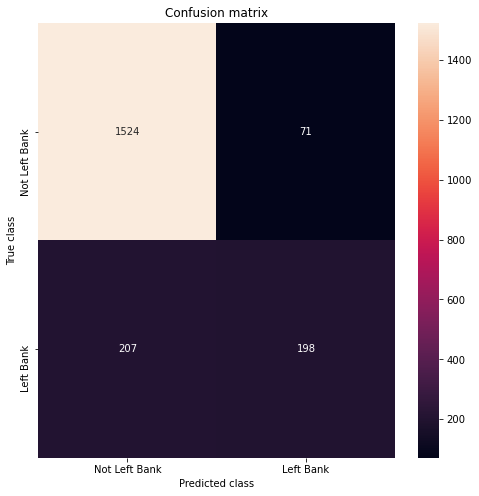

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ['Not Left Bank', 'Left Bank'] 
plt.figure(figsize =(8, 8)) 
sns.heatmap(cm, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()